# section10

What should we talk about today?  And upfront, I don't know a lot about any of the libraries from class this week.  We're definitely in the trenches together now.

### Breaking strings over multiple lines

First short thing, can we stop using the "\" character for line continuations?

In [4]:
text = ("I want to create text "
       "and I want it to span "
       "multiple lines.  The nice "
       "thing about using the par"
       "entheses is that we easily "
       "keep the correct line "
       "indentation.")

text

'I want to create text and I want it to span multiple lines.  The nice thing about using the parentheses is that we easily keep the correct line indentation.'

### Ditto with code

Same sort of deal with code.  If your code runs off the end of the line, it becomes unreadable.  If the problem isn't solved by writing a helper function, thinking about how to break things over multiple lines with parentheses.

In [5]:
# what if we have an expression that we want to span multiple lines?

def in_list_of_list(num,my_list):
    if my_list == []:
        return False
    else:
        if type(my_list[0]) == list:
            # this next line in particular is really long!
            return in_list_of_list(num,my_list[0]) or in_list_of_list(num,my_list[1:])
        else:
            return my_list[0] == num or in_list(num,my_list[1:])
        
        
        
def in_list_of_list(num,my_list):
    if my_list == []:
        return False
    else:
        if type(my_list[0]) == list:
            return (in_list_of_list(num,my_list[0]) or
                    in_list_of_list(num,my_list[1:]) )
        else:
            return my_list[0] == num or in_list(num,my_list[1:])

In [6]:
memo_dict = dict((i,i) for i in range(1,5))

def too_recursive(n):
    ("this function returns the number created by a quadruple recursion"
    " instead of the mere double recursion you would see in a Fibona"
    "cci sequence.")
    
    if n in memo_dict:
        return memo_dict[n]
    else:
        memo_dict[n] = (too_recursive(n-1) + too_recursive(n-2) + too_recursive(n-3) + too_recursive(n-4))
        return memo_dict[n]

In [7]:
for n in range(1,15):
    print(too_recursive(n), end= ", ")

1, 2, 3, 4, 10, 19, 36, 69, 134, 258, 497, 958, 1847, 3560, 

In [8]:
memo_dict = dict((i,i) for i in range(1,5))

def too_recursive(n):
    ("this function returns the number created by a quadruple recursion"
    " instead of the mere double recursion you would see in a Fibona"
    "cci sequence.")
    
    if n in memo_dict:
        return memo_dict[n]
    else:
        memo_dict[n] = (too_recursive(n-1) +
                        too_recursive(n-2) +
                        too_recursive(n-3) +
                        too_recursive(n-4))
        
        return memo_dict[n]

In [9]:
too_recursive(15)

6862

# Poking around under the hood

I was playing around with some stuff this past week.  Turns out, if you want to see the namespace associated with your notebook, you can import and call help and the notebooks namespace:

In [15]:
from numpy import *

In [16]:
import __main__

help(__main__)

Help on module __main__:

NAME
    __main__ - Automatically created module for IPython interactive environment

FUNCTIONS
    add_docstring(...)
        add_docstring(obj, docstring)
        
        Add a docstring to a built-in obj if possible.
        If the obj already has a docstring raise a RuntimeError
        If this routine does not know how to add a docstring to the object
        raise a TypeError
    
    add_newdoc_ufunc = _add_newdoc_ufunc(...)
        add_ufunc_docstring(ufunc, new_docstring)
        
        Replace the docstring for a ufunc with new_docstring.
        This method will only work if the current docstring for
        the ufunc is NULL. (At the C level, i.e. when ufunc->doc is NULL.)
        
        Parameters
        ----------
        ufunc : numpy.ufunc
            A ufunc whose current doc is NULL.
        new_docstring : string
            The new docstring for the ufunc.
        
        Notes
        -----
        This method allocates memory for n

# On to stuff from class:

Numpy array shape?  The example in class looks like an 8x1, but its shape is (8,).

What's going on here?  In short, Numpy Arrays are like matrices, but are actually superclasses.  While a matrix is 2 dimensional, and will give 2 coordinates for size, a numpy array can be of any dimension (ok, within reason).  If you see (8,), that's a 1-dimensional array.


In [17]:
import numpy as np

In [18]:
my_list = range(12)

In [19]:
my_array = np.array(my_list)

In [20]:
print(my_array,my_array.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11] (12,)


In [21]:
print(my_array.shape)

(12,)


See how our list of 12 numbers becomes a 1-dimensional array of length 12.

In [22]:
my_array.shape = (12,1)

print(my_array,my_array.shape)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]] (12, 1)


In [23]:
my_array.shape = (1,12)

print(my_array,my_array.shape)

[[ 0  1  2  3  4  5  6  7  8  9 10 11]] (1, 12)


We can reshape our array to be a column vector or a row vector.

In [25]:
my_array.shape = (12,)

print(my_array,my_array.shape)

[ 0  1  2  3  4  5  6  7  8  9 10 11] (12,)


Or we can change the matrix back to a 1-dimensional construct.

In [26]:
my_array * my_array

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [27]:
my_array * my_array.T

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

Notice how we don't get matrix multiplication with our 1-dimensional arrays.  Of course, changing the shape doesn't quite get that either.

In [28]:
my_array.shape = (12,1)

In [29]:
my_array * my_array, my_array.T * my_array.T


(array([[  0],
        [  1],
        [  4],
        [  9],
        [ 16],
        [ 25],
        [ 36],
        [ 49],
        [ 64],
        [ 81],
        [100],
        [121]]),
 array([[  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121]]))

Looks like we get pairwise multiplication if the dimensions are the same.  What if the arrays are perpendicular?

In [28]:
my_array * my_array.T

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11],
       [  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22],
       [  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33],
       [  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44],
       [  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55],
       [  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66],
       [  0,   7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77],
       [  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88],
       [  0,   9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99],
       [  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110],
       [  0,  11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121]])

In [29]:
my_array.T * my_array

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11],
       [  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22],
       [  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33],
       [  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44],
       [  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55],
       [  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66],
       [  0,   7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77],
       [  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88],
       [  0,   9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99],
       [  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110],
       [  0,  11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121]])

In this case, one of these looks like matrix multiplication, but I think it's just scalar-vector distribution since we get the same result in both cases.  How do we actually multiply matrices?

In [30]:
np.matmul(my_array.T, my_array)

array([[506]])

In [31]:
np.matmul(my_array, my_array.T)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11],
       [  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22],
       [  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33],
       [  0,   4,   8,  12,  16,  20,  24,  28,  32,  36,  40,  44],
       [  0,   5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55],
       [  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66],
       [  0,   7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77],
       [  0,   8,  16,  24,  32,  40,  48,  56,  64,  72,  80,  88],
       [  0,   9,  18,  27,  36,  45,  54,  63,  72,  81,  90,  99],
       [  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110],
       [  0,  11,  22,  33,  44,  55,  66,  77,  88,  99, 110, 121]])

What happens when we convert back to 1 dimensional arrays?

In [32]:
my_array.shape = (12,)
print(np.matmul(my_array.T,my_array))
print(np.matmul(my_array,my_array.T))
print(np.matmul(my_array,my_array))

506
506
506


It strongly looks like 1D arrays only give an inner product, no matter their configuration.  This makes sense as a transpose is meangingless on 1D object.

### More numpy

In [64]:
x1 = np.arange(9).reshape((3, 3))

x2 = np.arange(3.0)
np.add(x1, x2)

array([[  0.,   2.,   4.],
       [  3.,   5.,   7.],
       [  6.,   8.,  10.]])

In [65]:
x1 = np.arange(10).reshape((2, 5))
x2 = np.arange(5)
np.add(x1, x2)

array([[ 0,  2,  4,  6,  8],
       [ 5,  7,  9, 11, 13]])

In [66]:
test = np.arange(10).reshape((2,5))
test

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [67]:
test + 1

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]])

In [68]:
test + (1,2,3,4,5)

array([[ 1,  3,  5,  7,  9],
       [ 6,  8, 10, 12, 14]])

In [69]:
test[0:2][0:1] += 10

In [70]:
test

array([[10, 11, 12, 13, 14],
       [ 5,  6,  7,  8,  9]])

In [47]:
test[0] -= 2

In [50]:
test[0][2] += 1

In [51]:
test

array([[-1,  0,  2,  2,  3],
       [ 5,  6,  7,  8,  9]])

In [79]:
test = np.arange(100).reshape((10,10))
test

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [80]:
test[1][:] -=9
test[2][:] -= 18

In [81]:
test

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [84]:
for i in range(3,10):
    test[i][:] -= 9*i

In [85]:
test

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
       [ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
       [ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       [ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       [ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
       [ 8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
       [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]])

In [86]:
new = test[:][:]

In [87]:
new[1:5][1:5]

array([[ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13]])

That seems counterintuitive?  Well, to me it does.  What just happened?

In [88]:
new[1:5,1:5]

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7],
       [5, 6, 7, 8]])

# TL;DR

Numpy is a great library, but make sure you understand it.

# Matplotlib

Plotting?  Nenad mentioned plotting.

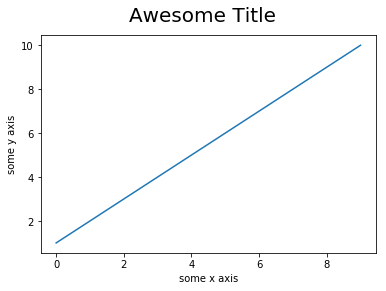

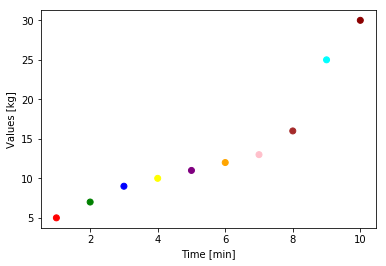

In [47]:
import matplotlib.pyplot as plt
import numpy
#making a numpy array of a range of numbers from 1-10
n1 = numpy.array(range(1,11))

fig = plt.figure()
fig.suptitle('Awesome Title', fontsize=20)

plt.plot(n1)
plt.xlabel('some x axis')
plt.ylabel('some y axis')
plt.show()
fig.savefig('myfig.jpg')
plt.clf() #clear figure

n2 = numpy.array([5,7,9,10,11,12,13,16,25,30])
plt.scatter(n1,n2,color=['red','green','blue','yellow',
                         'purple','orange','pink','brown','cyan',                       
                        'darkred'])
plt.xlabel('Time [min]')
plt.ylabel('Values [kg]')
plt.show()

Anybody else find that annoying?

In [44]:
%matplotlib inline

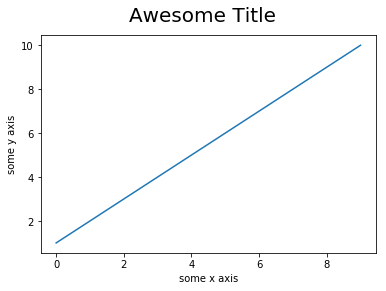

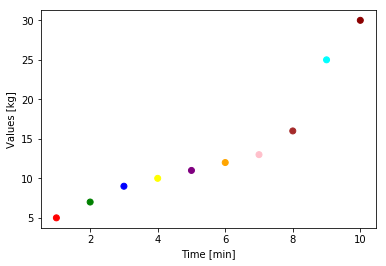

In [48]:
import matplotlib.pyplot as plt
import numpy
#making a numpy array of a range of numbers from 1-10
n1 = numpy.array(range(1,11))

fig = plt.figure()
fig.suptitle('Awesome Title', fontsize=20)

plt.plot(n1)
plt.xlabel('some x axis')
plt.ylabel('some y axis')
plt.show()
fig.savefig('myfig.jpg')
plt.clf() #clear figure

n2 = numpy.array([5,7,9,10,11,12,13,16,25,30])
plt.scatter(n1,n2,color=['red','green','blue','yellow',
                         'purple','orange','pink','brown','cyan',                       
                        'darkred'])
plt.xlabel('Time [min]')
plt.ylabel('Values [kg]')
plt.show()
fig.savefig("my_second_fig.jpg")

In [ ]:
import matplotlib.pyplot as plt
import numpy
#making a numpy array of a range of numbers from 1-10
n1 = numpy.array(range(1,11))

fig = plt.figure()
fig.suptitle('Awesome Title', fontsize=20)

plt.plot(n1)
plt.xlabel('some x axis')
plt.ylabel('some y axis')
plt.show()
fig.savefig('myfig.jpg')
plt.clf() #clear figure

fig = plt.figure()
n2 = numpy.array([5,7,9,10,11,12,13,16,25,30])
plt.scatter(n1,n2,color=['red','green','blue','yellow',
                         'purple','orange','pink','brown','cyan',                       
                        'darkred'])
plt.xlabel('Time [min]')
plt.ylabel('Values [kg]')
plt.show()
fig.savefig("my_second_fig.jpg")

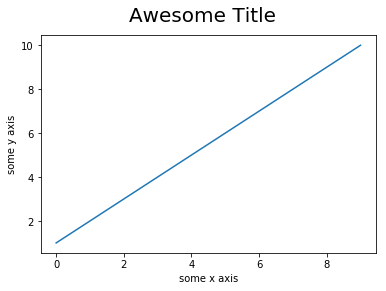

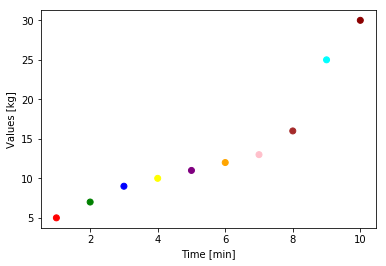

In [50]:
import matplotlib.pyplot as plt
import numpy
#making a numpy array of a range of numbers from 1-10
n1 = numpy.array(range(1,11))

fig = plt.figure()
fig.suptitle('Awesome Title', fontsize=20)

plt.plot(n1)
plt.xlabel('some x axis')
plt.ylabel('some y axis')
plt.show()
fig.savefig('myfig.jpg')

# One or the other of these is important if you're going to save
# the preceding and succeeding figures.
plt.clf() #clear figure
fig = plt.figure()

n2 = numpy.array([5,7,9,10,11,12,13,16,25,30])
plt.scatter(n1,n2,color=['red','green','blue','yellow',
                         'purple','orange','pink','brown','cyan',                       
                        'darkred'])
plt.xlabel('Time [min]')
plt.ylabel('Values [kg]')
plt.show()
fig.savefig("my_second_fig.jpg")

# Pandas



The following came up in class. What does int64 mean?

In [92]:
x = np.array([1])

In [93]:
x.dtype = "int32"

In [94]:
x

array([1, 0], dtype=int32)

In [95]:
x.dtype

dtype('int32')

In [99]:
x + 2**32

array([4294967297, 4294967296], dtype=int64)

In [100]:
x + 2**64

array([18446744073709551617, 18446744073709551616], dtype=object)

As you might have guessed, int64 is a 64 bit number (and int32 is a 32 bit number).  When you do arithmetic that exceeds the bounds of these numbers, python upcasts the type to keep your arithmetic working.

I think I found an error in Nenad's notes:

In [101]:
from pandas import Series, DataFrame
import pandas as pd

Nenad claims that the following will create a serios ordered by value

In [102]:
population = {'NY City':8000000, 'LA':4000000,'Boston':650000}
s_pop = Series(population)
s_pop

Boston      650000
LA         4000000
NY City    8000000
dtype: int64

Notice that this is ordered by value ... or is it ordered by key?

In [103]:
population = {'NY City':8, 'LA':4000000,'Boston':650000}
s_pop = Series(population)
s_pop

Boston      650000
LA         4000000
NY City          8
dtype: int64

And trying to pervert things even further:

In [104]:
population = {'NY City':8000000, 'LA':4000000,'boston':650000}
s_pop = Series(population)
s_pop

LA         4000000
NY City    8000000
boston      650000
dtype: int64

It appears that we're sorting by key, and we're not using a "natural sort", but rather the ascii value sort where all upper case comes before all lower case.

I think this all makes sense.  If you're going to build a new object, are you going to use a different sorting order than comes with standard Python?  No, probably not; ascii ordering makes sense.

And if you're going to keep your Series in a sorted order, should you sort by key or value?  I think you'd probably want to sort by Key, the thing that in some sense takes precedence over the values, the thing which is merely being described by the value.

In [105]:
s_pop.sort_index?

In [106]:
s_pop.sort_index()

LA         4000000
NY City    8000000
boston      650000
dtype: int64

In [107]:
s_pop.sort_values()


boston      650000
LA         4000000
NY City    8000000
dtype: int64

In [108]:
s_pop

LA         4000000
NY City    8000000
boston      650000
dtype: int64

Ok, that's all manner of annoying.  The sort functionality sorts as it promises, but it doesn't sort in place.  That's something really important to know.

Another subtle thing I noticed in the lecture notes:

In [109]:
cities2 = ["boston","LA","Cambridge","Somerville"]
s_pop_larger = Series(s_pop, index = cities2)
s_pop_larger

boston         650000.0
LA            4000000.0
Cambridge           NaN
Somerville          NaN
dtype: float64

What do s_pop and s_pop_larger look like side by side?

In [110]:
print(s_pop,s_pop_larger,sep = "\n\n")

LA         4000000
NY City    8000000
boston      650000
dtype: int64

boston         650000.0
LA            4000000.0
Cambridge           NaN
Somerville          NaN
dtype: float64


And what should their sum be equal to?

In [111]:
s_pop + s_pop_larger

Cambridge           NaN
LA            8000000.0
NY City             NaN
Somerville          NaN
boston        1300000.0
dtype: float64

Does this make sense to you?  Notce how LA and boston double in their population, which shoul make sense since the appear in both series with the same value.  But NY City is Nan??  That's because it has value 8,000,000 in one list, and Nan in the other.  That's because 8,000,000 + Nan = Nan.  This is a feature that forces you to deal with NaN entries in your data.  And know that if you don't deal with NaN entries, they'll potentially corrupt the good data that you do have.

# Pandas

What did Nenad cover about Pandas?  Start from the first cell:

In [142]:
my_df = pd.DataFrame(np.random.random([3, 3]),columns=['Pset 1', 'Pset 2', 'Pset 3'], index=['Student 1', 'Student 2', 'Student 3'])
my_df*=100
my_df = my_df.round(2)
my_df

,Pset 1,Pset 2,Pset 3
Student 1,50.94,5.06,43.24
Student 2,30.81,49.43,7.16
Student 3,31.19,12.38,24.73


First up, a cosmetic issue from the lecture code.  How could we make the first line more readable?

In [143]:
my_df = pd.DataFrame(np.random.random([3, 3]),
                     columns=['Pset 1', 'Pset 2', 'Pset 3'],
                     index=['Student 1', 'Student 2', 'Student 3'])
my_df*=100
my_df = my_df.round(2)
my_df

,Pset 1,Pset 2,Pset 3
Student 1,63.49,23.85,6.20
Student 2,93.00,34.46,31.55
Student 3,8.48,76.57,40.29


Much better :-)  Remember that readability counts.

In [144]:
d = {"name":['Jen','Ali','Kwabena','Goran'],
     "dob":[1970,1965,1980,1983],
    "salary":[100000,90000,95000,70000]}

my_df1 = DataFrame(d)
my_df1

,dob,name,salary
0,1970,Jen,100000
1,1965,Ali,90000
2,1980,Kwabena,95000
3,1983,Goran,70000


How could we recreate this with an index that wasn't straight numbers?

In [150]:
index_names = ["student" + i for i in range4]

my_df2 = DataFrame(d,index = index_names)
my_df2

,dob,name,salary
student 0,1970,Jen,100000
student 1,1965,Ali,90000
student 2,1980,Kwabena,95000
student 3,1983,Goran,70000


Did I leave bugs in there intentionally for you to help me out?  Or am I just a nitwit?  Hard to say!

Ok, let's build on this.

In [ ]:
d = {"name":['Jen','Ali','Kwabena','Goran'],
     "dob":[1970,1965,1980,1983],
    "salary":[100000,90000,95000,70000]}

In [151]:
import random

In [152]:
random.choice?

In [165]:
rows = 20
names = [random.choice(d["name"]) for i in range(rows)]
dobs = [random.choice(d["dob"]) for i in range(rows)]
salaries = [random.choice(d["salary"]) for i in range(rows)]

In [169]:
d_new = dict(zip(d.keys(),[salaries,names,dobs]))

In [170]:
my_df3 = DataFrame(d_new)

In [171]:
my_df3

,dob,name,salary
0,1970,Goran,70000
1,1965,Ali,90000
2,1980,Goran,90000
3,1965,Ali,90000
4,1965,Kwabena,100000
5,1983,Jen,70000
6,1980,Jen,70000
7,1983,Goran,95000
8,1970,Kwabena,95000
9,1965,Kwabena,100000


I feel like we glossed over the real power of Pandas.  What if I wanted a mean of the dates of birth?

In [174]:
np.mean(my_df3['dob'])

1975.6

What if I want to sort by names alphabetically?

In [176]:
my_df3.sort?

In [180]:
my_df3.sort(columns = ["name"])

/Users/multiuser/anaconda/envs/python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,dob,name,salary
1,1965,Ali,90000
3,1965,Ali,90000
16,1970,Ali,100000
13,1983,Ali,95000
0,1970,Goran,70000
2,1980,Goran,90000
7,1983,Goran,95000
18,1965,Goran,100000
11,1983,Goran,100000
5,1983,Jen,70000


Depracated.  I hate that warning.  But, let's sort_values instead to make Python happy.

In [181]:
my_df3.sort_values?

In [182]:
my_df3.sort_values(by = 'name')

,dob,name,salary
1,1965,Ali,90000
3,1965,Ali,90000
16,1970,Ali,100000
13,1983,Ali,95000
0,1970,Goran,70000
2,1980,Goran,90000
7,1983,Goran,95000
18,1965,Goran,100000
11,1983,Goran,100000
5,1983,Jen,70000


Ok, cool.  What if we want to sort by name and also by date of birth?

In [183]:
my_df3.sort_values(by = ['name',"dob"])

,dob,name,salary
1,1965,Ali,90000
3,1965,Ali,90000
16,1970,Ali,100000
13,1983,Ali,95000
18,1965,Goran,100000
0,1970,Goran,70000
2,1980,Goran,90000
7,1983,Goran,95000
11,1983,Goran,100000
6,1980,Jen,70000


And by salary too?!

In [184]:
my_df3.sort_values(by = ['name','dob','salary'])

,dob,name,salary
1,1965,Ali,90000
3,1965,Ali,90000
16,1970,Ali,100000
13,1983,Ali,95000
18,1965,Goran,100000
0,1970,Goran,70000
2,1980,Goran,90000
7,1983,Goran,95000
11,1983,Goran,100000
6,1980,Jen,70000


Hell yeah!  Sorting is sooooo nice with dataframes.  Can you imagine if we had to write a lambda function to figure out how to set precedence so that we always sorted by the second column first, and then the first column?!?!

One more really important thing.  What if we want to sort the DataFrame in place?

In [189]:
my_df3.sort_values?

In [190]:
my_df3.sort_values(by = ['name','dob','salary'])

In [191]:
my_df3

,dob,name,salary
1,1965,Ali,90000
3,1965,Ali,90000
16,1970,Ali,100000
13,1983,Ali,95000
18,1965,Goran,100000
0,1970,Goran,70000
2,1980,Goran,90000
7,1983,Goran,95000
11,1983,Goran,100000
6,1980,Jen,70000


So, previously, I took the mean of a column, but what if I want to know the average age of a Kwabena?

In [192]:
my_df3.groupby?

In [201]:
groups = my_df3.groupby(by = 'name')


In [202]:
groups.describe()

dob         salary
name                                     
Ali     count     4.000000       4.000000
        mean   1970.750000   93750.000000
        std       8.500000    4787.135539
        min    1965.000000   90000.000000
        25%    1965.000000   90000.000000
        50%    1967.500000   92500.000000
        75%    1973.250000   96250.000000
        max    1983.000000  100000.000000
Goran   count     5.000000       5.000000
        mean   1976.200000   91000.000000
        std       8.228001   12449.899598
        min    1965.000000   70000.000000
        25%    1970.000000   90000.000000
        50%    1980.000000   95000.000000
        75%    1983.000000  100000.000000
        max    1983.000000  100000.000000
Jen     count     3.000000       3.000000
        mean   1982.000000   78333.333333
        std       1.732051   14433.756730
        min    1980.000000   70000.000000
        25%    1981.500000   70000.000000
        50%    1983.000000   70000.000000
        75%    1983.000000   82500.000000
        max    1983.000000   95000.000000
Kwabena count     8.000000       8.000000
        mean   1975.250000   94375.000000
        std       8.497899    4172.614802
        min    1965.000000   90000.000000
        25%    1968.750000   90000.000000
        50%    1976.500000   95000.000000
        75%    1983.000000   96250.000000
        max    1983.000000  100000.000000

But we just wanted the mean.

In [204]:
groups.apply(np.mean)

,dob,salary
name,,
Ali,1970.75,93750.000000
Goran,1976.20,91000.000000
Jen,1982.00,78333.333333
Kwabena,1975.25,94375.000000


How about the total salary of everyone named Ali?

In [205]:
groups.apply(sum)

,dob,salary
name,,
Ali,7883,375000
Goran,9881,455000
Jen,5946,235000
Kwabena,15802,755000


In [208]:
groups.apply(sum)['dob']

name
Ali         7883
Goran       9881
Jen         5946
Kwabena    15802
Name: dob, dtype: int64

In [206]:
groups.aggregate?

What if I want all Ali's born before 1970?

In [232]:
my_df3[(my_df3['name'] == "Ali") and (my_df3['dob']==1965)]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

What went wrong?  This is one of those frustrating things ... like many things with indexing dataframes.

In [233]:
my_df3[(my_df3['name'] == "Ali") & (my_df3['dob']==1965)]

,dob,name,salary
1,1965,Ali,90000
3,1965,Ali,90000


# Wrapping up

I know there was sklearn, bokeh, and plotly, but I'm not going to talk about those three, mostly because I'm not versed in them.  If you have questions about them, let me know and I can help you figure things out.

Oh!  Remember the command for the notebook namespace:

In [235]:
help(__main__)

Help on module __main__:

NAME
    __main__ - Automatically created module for IPython interactive environment

FUNCTIONS
    too_recursive(n)
        this function returns the number created by a quadruple recursion instead of the mere double recursion you would see in a Fibonacci sequence.

DATA
    Dataframe = {'dob': [95000, 90000, 95000, 95000, 90000, 90000, 70000, ...
    In = ['', 'text = ("I want to create text "\n       "and I w...  "keep...
    Out = {2: 'I want to create text and I want it to span mult...that we ...
    __ =     dob name  salary
    1  1965  Ali   90000
    3  1965  Ali   90000
    ___ =     dob name  salary
    1  1965  Ali   90000
    3  1965  Ali   90000
    cities2 = ['boston', 'LA', 'Cambridge', 'Somerville']
    d = {'dob': [1970, 1965, 1980, 1983], 'name': ['Jen', 'Ali', 'Kwabena'...
    d_new = {'dob': [1970, 1965, 1980, 1965, 1965, 1983, 1980, 1983, 1970,...
    dobs = [1970, 1965, 1980, 1965, 1965, 1983, 1980, 1983, 1970, 1965, 19...
    exit = <IP